In [50]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [23]:
feb_vectors = np.load(".//data//arxiv test//feb//feb_inferred_vectors.npy")
feb_papers = np.load(".//data//arxiv test//feb//feb_good_papers.npy")

feb_results_df = pd.read_csv("lr_feb_results.csv")
feb_results_df.head()

feb_df = pd.DataFrame(feb_vectors)
feb_df["ea prob"] = feb_results_df["ea prob"]
feb_df["source"] = "feb"

feb_df.head()

(1743, 600)


,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,ea prob,source
0,-0.168622,-0.132575,-0.111370,-0.016159,-0.147179,-0.052612,-0.259438,-0.260758,-0.241815,0.303085,...,-0.215112,-0.195508,0.362219,0.230822,-0.229691,-0.467327,-0.308983,0.048214,0.025227,feb
1,-0.852917,-0.098700,-0.168356,0.155176,0.341153,0.063643,-0.154522,-0.091102,-0.012636,0.308401,...,0.021949,0.258261,0.302605,-0.413259,0.013836,-0.213313,-0.403226,0.200356,0.025284,feb
2,-0.055933,-0.185382,-0.199830,0.257804,-0.257122,0.368190,-0.084500,-0.324122,-0.224946,0.328204,...,0.287746,0.185930,0.197679,-0.192635,0.012338,-0.149966,0.042001,0.073098,0.059849,feb
3,0.226894,-0.075230,-0.149943,-0.087697,0.180333,0.788311,0.010205,0.245074,0.149484,-0.005194,...,0.184323,0.230704,0.254560,-0.099013,-0.285573,-0.306469,-0.391682,0.351989,0.043146,feb
4,-0.003768,-0.335108,-0.171022,-0.068785,-0.102779,0.028012,-0.279151,-0.616968,-0.375763,-0.181762,...,0.804739,0.188640,-0.125718,0.295861,-0.004114,-0.272980,0.473294,0.153978,0.735074,feb


In [24]:
fname = ".//data//model_dbow_vs_600_n_5_s_0_inferred_training_data.csv"
training_df = pd.read_csv(fname).drop("Unnamed: 0", axis=1)
training_df = training_df.drop(columns="label")

lr_training_probs = np.load("lr_training_probs.npy")

training_df["ea prob"] = lr_training_probs
training_df["source"] = "train"

training_df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,ea prob,source
0,-0.024851,-0.381951,-0.651674,0.553038,1.299930,1.031808,0.333705,-0.101893,0.053647,0.222175,...,0.843307,0.379752,0.410750,-0.602648,0.904846,-0.157149,-0.013713,0.633879,0.001175,train
1,0.388153,0.000402,0.285238,-1.093168,-0.517576,-0.442416,0.572925,-0.000812,-0.088989,0.351440,...,0.308366,-0.036528,0.238906,-0.149262,0.399019,0.196109,-0.883065,-0.541812,0.986364,train
2,0.570890,-0.482221,-0.214128,-0.549572,-0.095529,0.389266,-0.176438,-0.252203,0.049001,-0.112858,...,0.627417,-0.015409,0.238097,0.032458,0.268519,-0.307194,0.311125,-0.459251,0.004757,train
3,-0.098389,-0.022716,-0.856276,-0.721896,-0.125313,0.093145,0.662419,-0.438362,0.227312,0.410582,...,-0.118163,0.440777,-0.599077,0.119088,-0.006456,-0.144061,-0.186257,0.228160,0.999236,train
4,-0.207901,-0.841178,0.095708,0.132864,0.298601,0.492365,-0.053234,0.299751,-0.317690,-0.691285,...,0.732972,0.405798,0.046836,0.045763,-0.604552,0.789747,0.100230,0.029443,0.001577,train


In [32]:
feb_df.columns = training_df.columns

vector_df = pd.concat([training_df, feb_df], axis=0)
vector_df

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,ea prob,source
0,-0.024851,-0.381951,-0.651674,0.553038,1.299930,1.031808,0.333705,-0.101893,0.053647,0.222175,...,0.843307,0.379752,0.410750,-0.602648,0.904846,-0.157149,-0.013713,0.633879,0.001175,train
1,0.388153,0.000402,0.285238,-1.093168,-0.517576,-0.442416,0.572925,-0.000812,-0.088989,0.351440,...,0.308366,-0.036528,0.238906,-0.149262,0.399019,0.196109,-0.883065,-0.541812,0.986364,train
2,0.570890,-0.482221,-0.214128,-0.549572,-0.095529,0.389266,-0.176438,-0.252203,0.049001,-0.112858,...,0.627417,-0.015409,0.238097,0.032458,0.268519,-0.307194,0.311125,-0.459251,0.004757,train
3,-0.098389,-0.022716,-0.856276,-0.721896,-0.125313,0.093145,0.662419,-0.438362,0.227312,0.410582,...,-0.118163,0.440777,-0.599077,0.119088,-0.006456,-0.144061,-0.186257,0.228160,0.999236,train
4,-0.207901,-0.841178,0.095708,0.132864,0.298601,0.492365,-0.053234,0.299751,-0.317690,-0.691285,...,0.732972,0.405798,0.046836,0.045763,-0.604552,0.789747,0.100230,0.029443,0.001577,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,-0.028954,0.181785,0.024733,0.040600,0.203355,-0.050645,0.003436,-0.241242,-0.298421,0.142034,...,0.294296,0.803128,0.011736,-0.228085,0.386396,-0.621611,-0.132494,-0.601950,0.858039,feb
1739,-0.366750,-0.384358,0.078843,-0.288288,-0.148771,0.029787,0.053080,0.115967,0.325750,0.323213,...,-0.168573,-0.114463,0.031158,-0.151790,-0.195176,-0.130250,0.056677,-0.511643,0.092639,feb
1740,0.196086,0.184090,-0.289277,0.282946,-0.094175,-0.869495,0.042094,-0.033730,0.215977,-0.160437,...,-0.241747,0.391085,0.185852,-0.266727,0.346561,-0.149559,-0.190128,-0.305927,0.031211,feb
1741,0.133988,0.366627,0.051657,-0.304253,-0.281892,0.411416,-0.432422,0.130509,0.050849,0.288821,...,0.054345,-0.061122,0.054094,0.008763,-0.232396,-0.278684,-0.183254,0.197062,0.047056,feb


In [46]:
all_vectors = vector_df.iloc[:, :600]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(all_vectors)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.01224512 0.01066166]
[111.49485881 104.0365043 ]


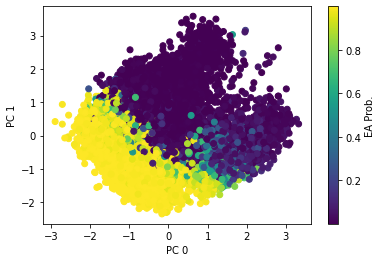

In [76]:
cmap = cm.get_cmap("viridis")

sc = plt.scatter(X_pca[:,0], X_pca[:,1], c=vector_df["ea prob"], cmap=cmap)

plt.colorbar(sc, label="EA Prob.")
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.show()